In [11]:
library(data.table)
library(ggplot2)

sig=fread('/ye/yelabstore2/dc.rna.seq/STRINGTIE.FINAL.FILTERED.matched/all/process.permutations/ifn.baseline.genes.fc.16.cis.all.snps.sig.txt')
ids=sig$gene


In [15]:
getData <- function(res_path, sig=sig){
    res=fread(res_path)
    all.df=data.frame(exp=-log10(1:nrow(res)/nrow(res)), obs=-log10(res$Empirical), cohort=basename(res_path), id=sapply(strsplit(res$Actual, '_'), '[', 2))
    all.df$cohort=as.character(all.df$cohort)
    new.points=all.df[which(all.df$id %in% ids),]
    new.points$cohort="DCs.RNAseq"
    new.points$exp=-log10(1:nrow(new.points)/nrow(new.points))
    
    #replace new distribution with old pvalues for intersecting SNP-gene pairs
    all.df[which(all.df$id %in% ids),]=new.points
    
    table(all.df$cohort)

    #downsample points
    xpvs=all.df$exp
    ypvs=all.df$obs

    levels = as.integer( xpvs/xpvs[1] * 0.5e3);
    keep = c(TRUE, diff(levels)!=0);
    levels = as.integer( ypvs/ypvs[1] * 0.5e3);
    keep = keep | c(TRUE, diff(levels)!=0);
    ypvs = ypvs[keep];
    xpvs = xpvs[keep];

    all.df.ds=all.df[keep, ]
    return(all.df.ds)

}

    

In [19]:
plotQQ <- function(df_in, legend=T){
    if(legend==T){
        ggplot(df_in, aes(x=exp, y=obs, color=cohort)) + geom_point() + scale_color_brewer(palette="Set2") + theme_bw() + geom_abline(intercept=0, slope=1)
    } else{
        ggplot(df_in, aes(x=exp, y=obs, color=cohort)) + geom_point() + scale_color_brewer(palette="Set2") + theme_bw() + geom_abline(intercept=0, slope=1) + theme(legend.position="none")
    }
}


Warning message in fread(res_path):
“Detected 5 column names but the data has 6 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not correct, or fix the file write command that created the file to create a valid file.”

Warning message in fread(res_path):
“Detected 5 column names but the data has 6 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not correct, or fix the file write command that created the file to create a valid file.”

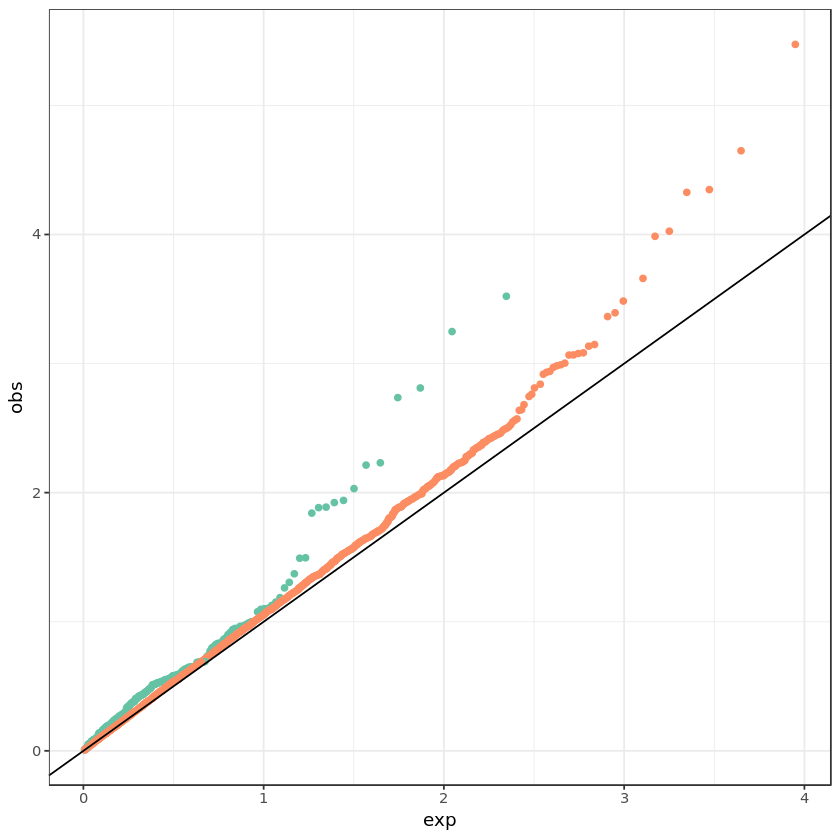

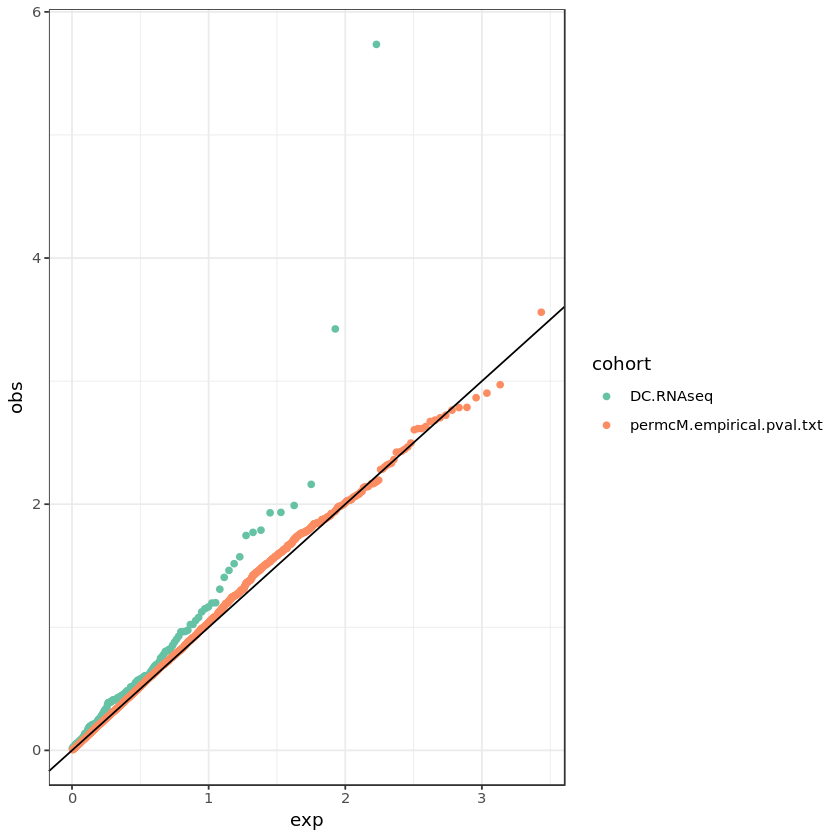

In [24]:
df=getData('/ye/yelabstore3/10x.lupus/eqtls/v5/sle.ifi6.10pcs.perm/permPBMC.empirical.pval.txt')
plotQQ(df, legend=F)
df=getData('/ye/yelabstore3/10x.lupus/eqtls/v5/sle.ifi6.10pcs.perm/permcM.empirical.pval.txt')
plotQQ(df)
